## 2. EDA

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
#from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTEENN

import warnings 
warnings.filterwarnings('ignore')

### 2.1 Data overview

In [2]:
#Load the data
df = pd.read_csv('coding_round_data.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()
# this dataset has 18 features and 12,330 rows 10 of the features are numerical and 8 are categorical
# Revenue is the label, indicating if a customer purchase the product or not.
# this dataset seems to have no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
#check missing values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
#There is no missing values for this dataset


#### Check The Label

<AxesSubplot:ylabel='Revenue'>

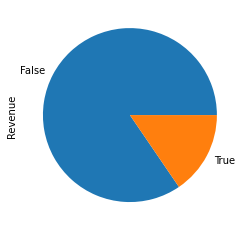

In [7]:
# Check the Revenue
df.Revenue.value_counts().plot(kind='pie')

In [8]:
(df.Revenue==True).sum() / len(df)

# there are only 15.47% churned customers. Imbalanced dataset

0.15474452554744525

<AxesSubplot:ylabel='Weekend'>

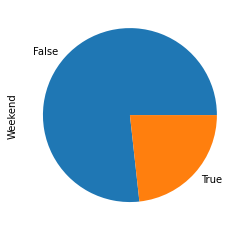

In [9]:
### Check Weekend or not

df.Weekend.value_counts().plot(kind='pie')

#### Encoding the bool features: 'Weekend' and 'Revenue'

In [10]:
Weekend_map = {
    False :0,
    True  :1
}

Revenue_map = {
    False :0,
    True  :1
}


In [11]:
#encoding
df.loc[:, 'Weekend']=df['Weekend'].map(Weekend_map)
df.loc[:, 'Revenue']=df['Revenue'].map(Revenue_map)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


#### Check Categorical Features

In [63]:
# this function is to show the 
def checkcategorical(categorical_feature):
    df_1 = pd.crosstab(df[categorical_feature],df['Revenue'])
    number = df_1.div(df_1.sum(1).astype(float),axis=0)[1]
    print(number)
    df_1.div(df_1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8, 3), tick_label =1, color = ['green', 'yellow'])
    plt.title(categorical_feature+ ' vs Revenue Rate', fontsize = 15)
    plt.legend(loc='upper right', title='Revenue')
    
    plt.show()


In [64]:
#Visitortype vs Revenue
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: 1, dtype: float64


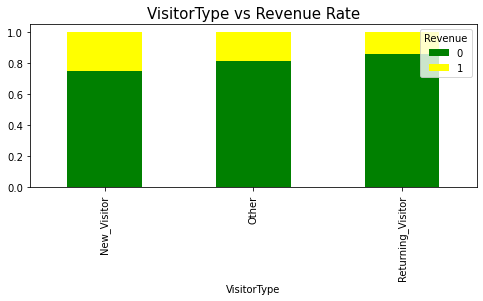

In [65]:
checkcategorical('VisitorType')

***Insights: New visitors have higher purchase rate than returning visitors, need to figure out why they are not returning***

In [67]:
# TrafficType vs Revenue
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

TrafficType
1     0.106895
2     0.216458
3     0.087719
4     0.154350
5     0.215385
6     0.119369
7     0.300000
8     0.276968
9     0.095238
10    0.200000
11    0.190283
12    0.000000
13    0.058266
14    0.153846
15    0.000000
16    0.333333
17    0.000000
18    0.000000
19    0.058824
20    0.252525
Name: 1, dtype: float64


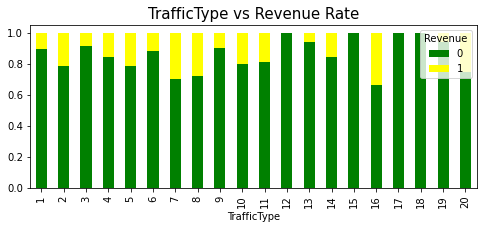

In [68]:
checkcategorical('TrafficType')

***Insights: Majority of the visitors coming from 1,2,3,4 some channels such as 12,17 have only 1 visitor for almost a year. For channel 15 and channel 18, no one made any purchases throught out the year. Might consider drop those channels***

***For channel 9,7,19,14,16 only small amount of the customers coming through those channels might consider drop those as well***

In [69]:
#Region vs Revenue
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Region
1    0.161297
2    0.165493
3    0.145235
4    0.148054
5    0.163522
6    0.139130
7    0.156373
8    0.129032
9    0.168297
Name: 1, dtype: float64


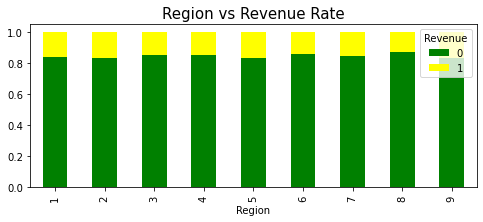

In [70]:
checkcategorical('Region')

In [71]:
# The revenue rate is similiar for all regions.
# Regions might not be the key features to influence the purchase

In [74]:
# Browser vs Revenue
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Browser
1     0.148253
2     0.153624
3     0.047619
4     0.176630
5     0.184154
6     0.114943
7     0.122449
8     0.155556
9     0.000000
10    0.196319
11    0.166667
12    0.300000
13    0.262295
Name: 1, dtype: float64


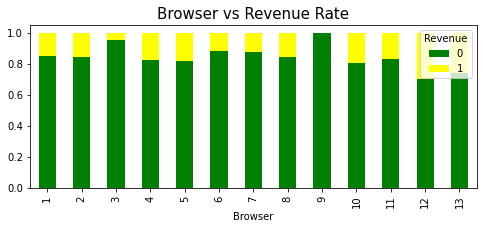

In [75]:
checkcategorical('Browser')

***Insights：Browser13，7，12，11，9 bring least amount of visitors. If the company spend money on those browsers, it is probably not worth the price.***

In [76]:
# OperatingSystems vs Revenue
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

OperatingSystems
1    0.146615
2    0.174973
3    0.104892
4    0.177824
5    0.166667
6    0.105263
7    0.142857
8    0.215190
Name: 1, dtype: float64


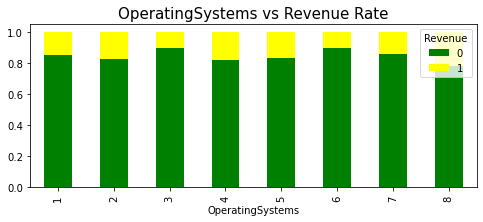

In [79]:
checkcategorical('OperatingSystems')

***Operating system 5,6,7,8 only have a few customers, if business parterner is spending money on those systems, they might consider stop that.***

In [80]:
#Month vs Revenue
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Month
Aug     0.175520
Dec     0.125072
Feb     0.016304
Jul     0.152778
June    0.100694
Mar     0.100682
May     0.108502
Nov     0.253502
Oct     0.209472
Sep     0.191964
Name: 1, dtype: float64


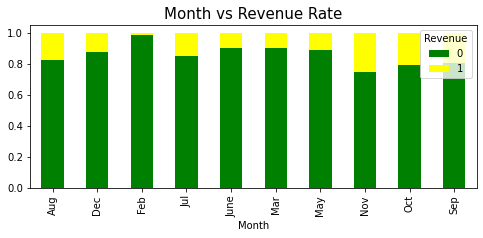

In [82]:
checkcategorical('Month')

***Only 184 people visited website on Feburary, maybe people still recovering from the holiday purchases. There are more visitors in May, November, March and December. Business might consider promoting the prduct during those months***

In [85]:
#SpecialDay vs Revenue
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

SpecialDay
0.0    0.165268
0.2    0.078652
0.4    0.053498
0.6    0.082621
0.8    0.033846
1.0    0.064935
Name: 1, dtype: float64


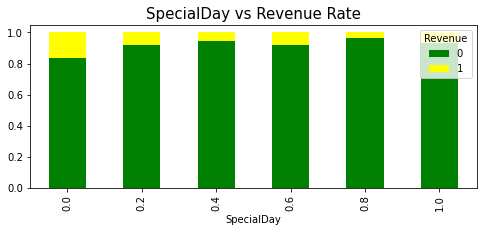

In [84]:
checkcategorical('SpecialDay')

***When it is close to a special day, people intended to visit the website and make purchases***

### 2.2 EDA on numerical features

#### 2.2.1 Overview on numerical features

In [93]:
df_num = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','Revenue']]

In [94]:
df_num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [95]:
num_features = df_num.columns

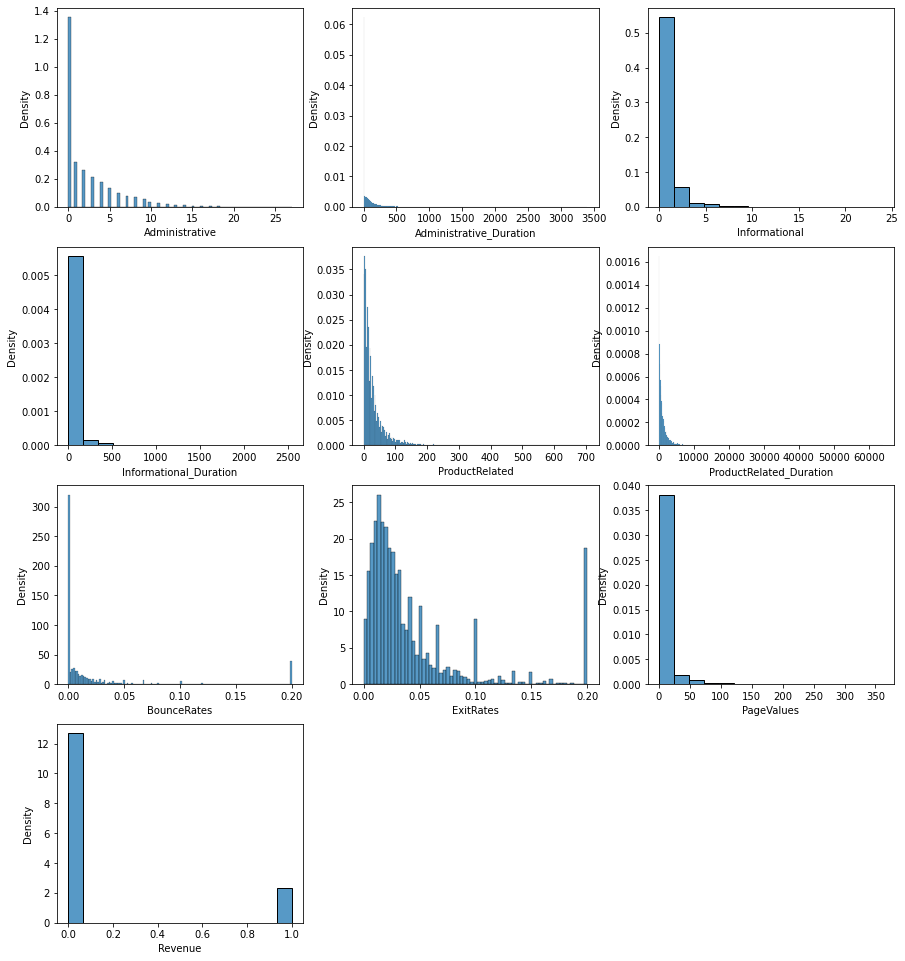

In [96]:
#bins = ["auto", 6, "auto", 6, 7, 7] + ["auto"] * 8
plt.figure(figsize=(15, 30))
for i in range(len(num_features)):
    plt.subplot(7, 3,i+1)
    sns.histplot(data=df, x=num_features[i], stat = "density",  kde=False)

In [115]:
# All of the data are right skewed... 

#### pairplot

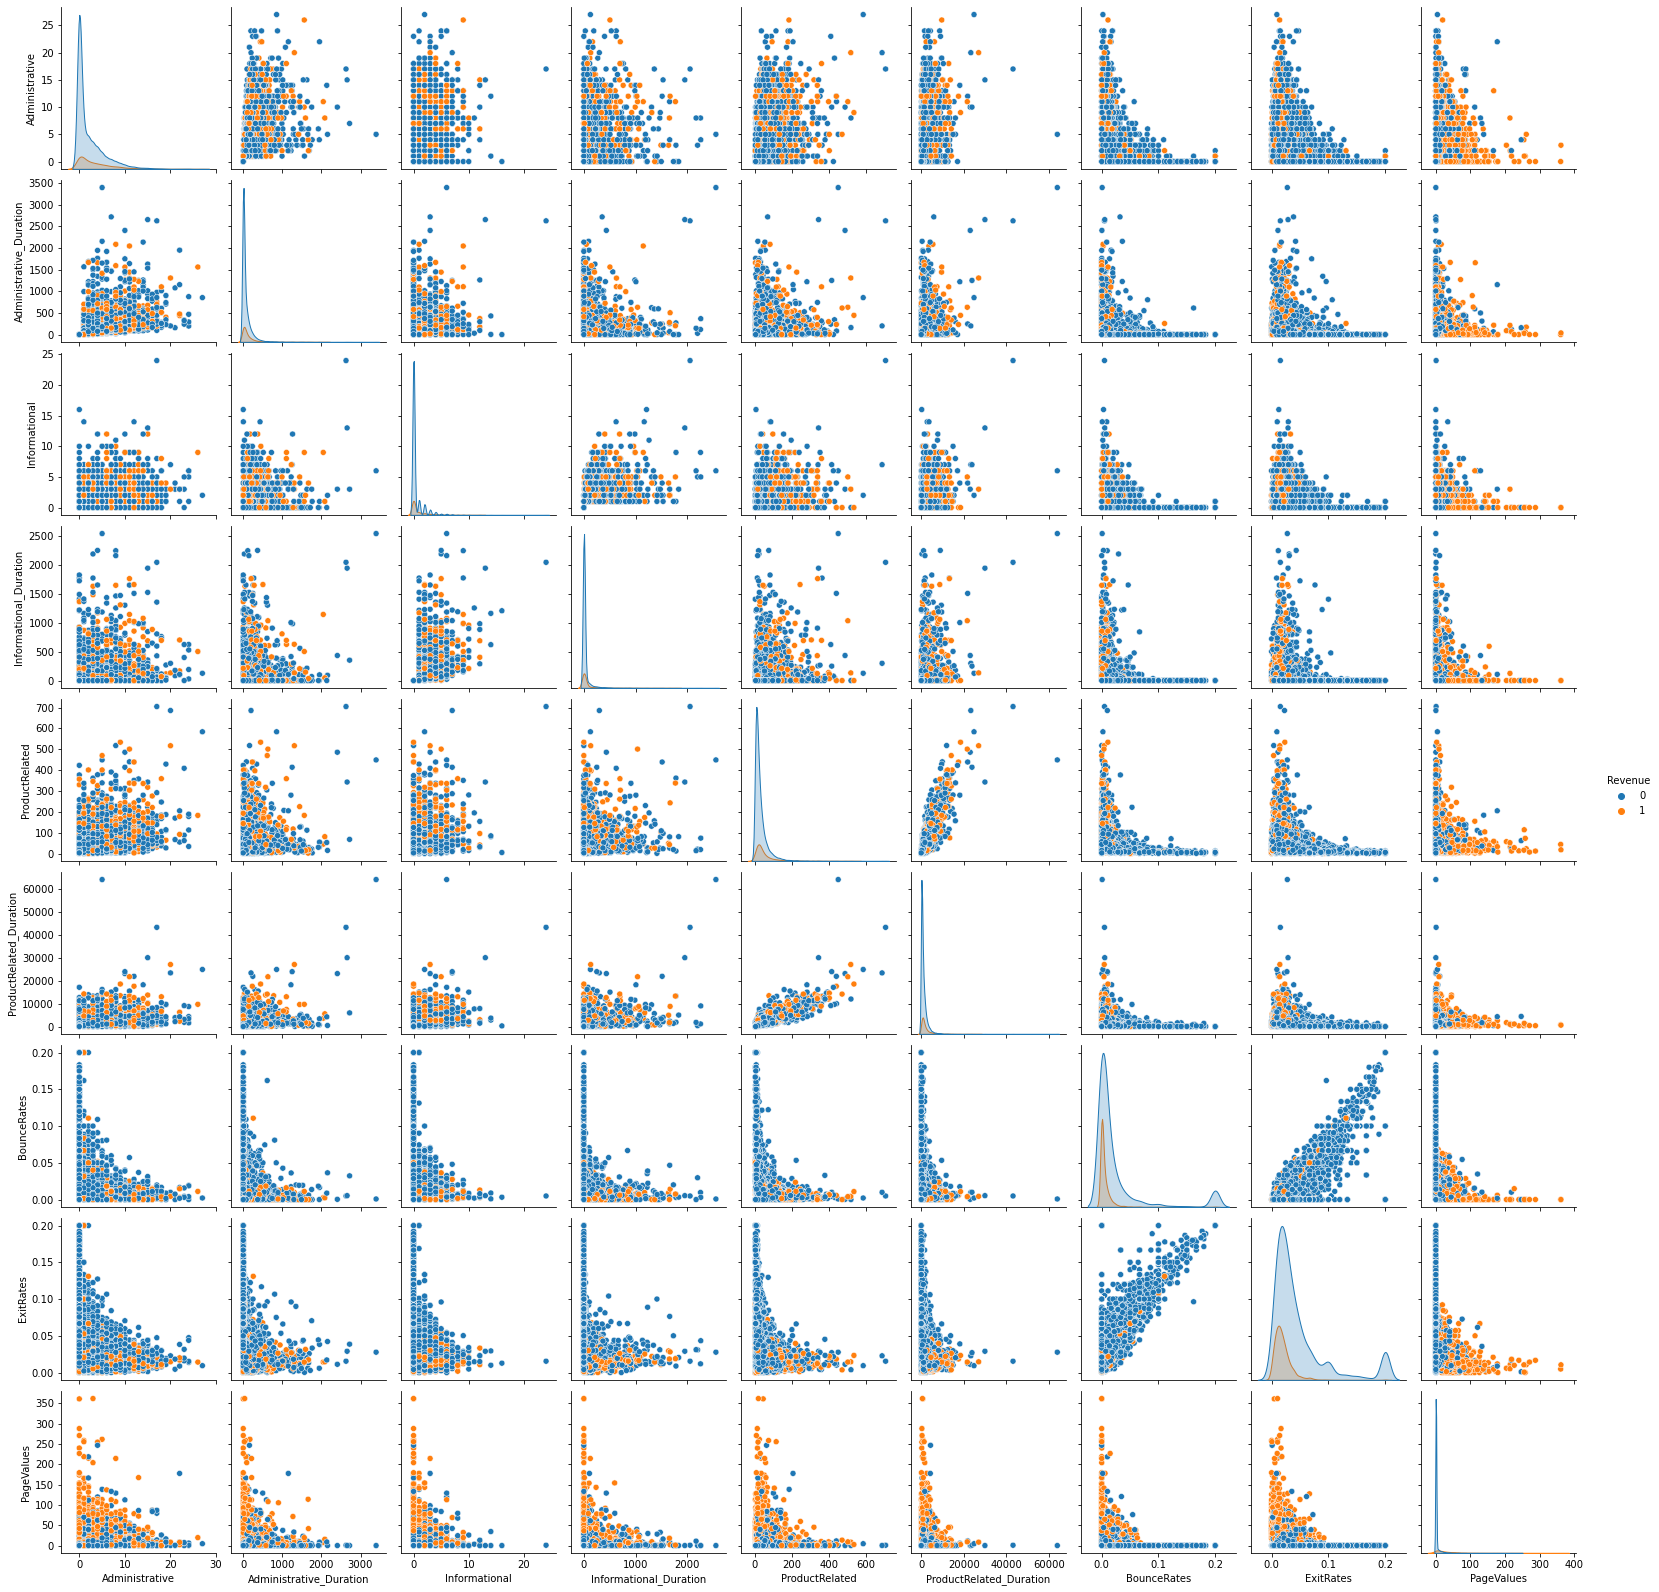

In [97]:
sns.pairplot(data=df_num,hue = 'Revenue')

In [98]:
df_num.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,0.492569
Revenue,0.138917,0.093587,0.095200,0.070345,0.158538,0.152373,-0.150673,-0.207071,0.492569,1.000000


<AxesSubplot:>

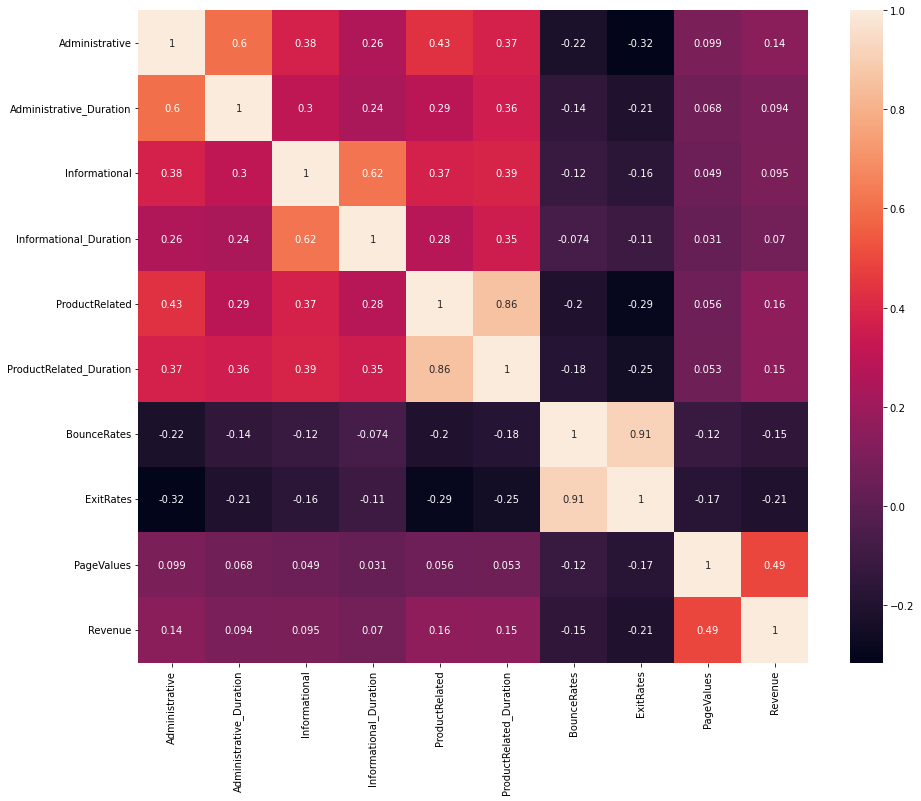

In [99]:
plt.figure(figsize=(15,12))
sns.heatmap(df_num.corr(), annot=True)

<AxesSubplot:>

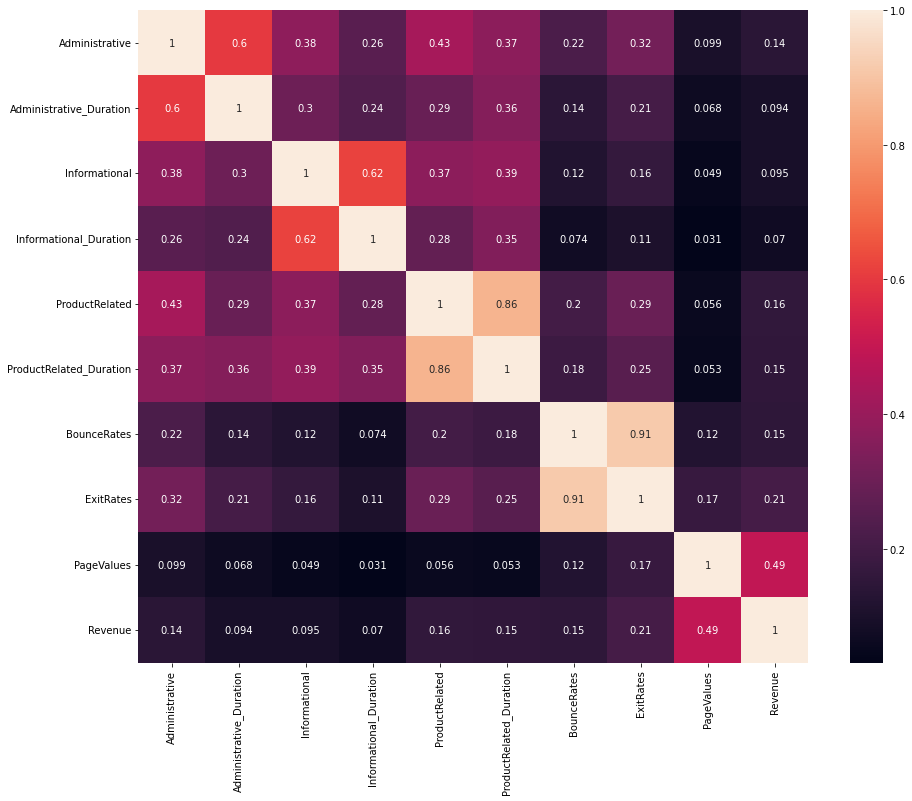

In [100]:
plt.figure(figsize=(15,12))
sns.heatmap(np.absolute(df_num.corr()), annot=True)

***Exit Rate is highly correlated to Bounce Rate, and product Related is highly correlated to product_related duration. Might consider drop one each features.***

<AxesSubplot:xlabel='Administrative', ylabel='Count'>

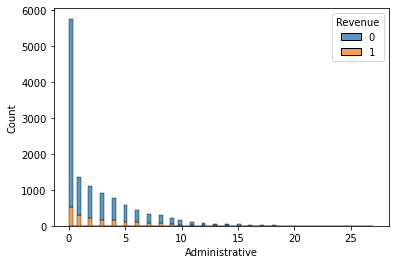

In [101]:
sns.histplot(data=df_num, x='Administrative', hue='Revenue', multiple='stack')

<AxesSubplot:xlabel='Administrative_Duration', ylabel='Count'>

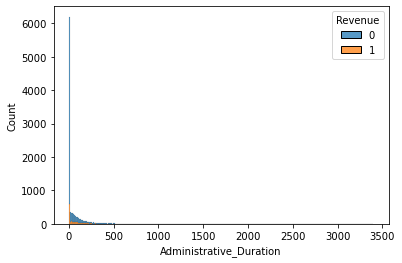

In [102]:
sns.histplot(data=df_num, x='Administrative_Duration', hue='Revenue', multiple='stack')

(0.0, 150.0)

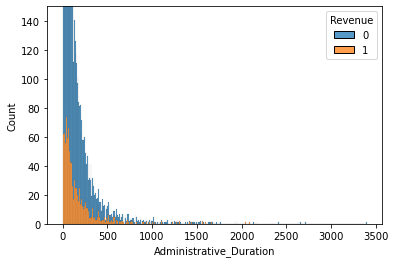

In [103]:
sns.histplot(data=df_num, x='Administrative_Duration', hue='Revenue', multiple='stack')
plt.ylim(0,150)

<AxesSubplot:xlabel='Informational', ylabel='Count'>

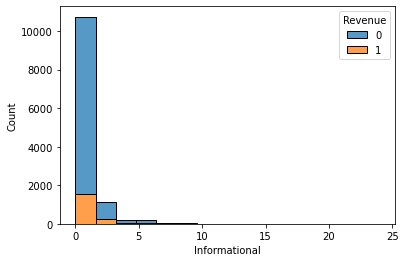

In [104]:
sns.histplot(data=df_num, x='Informational', hue='Revenue', multiple='stack')

<AxesSubplot:xlabel='Informational_Duration', ylabel='Count'>

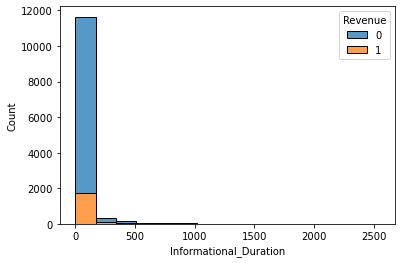

In [105]:
sns.histplot(data=df_num, x='Informational_Duration', hue='Revenue', multiple='stack')

<AxesSubplot:xlabel='ProductRelated', ylabel='Count'>

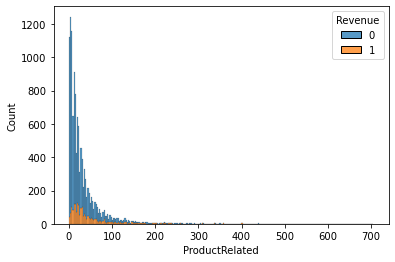

In [106]:
sns.histplot(data=df_num, x='ProductRelated', hue='Revenue', multiple='stack')

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Count'>

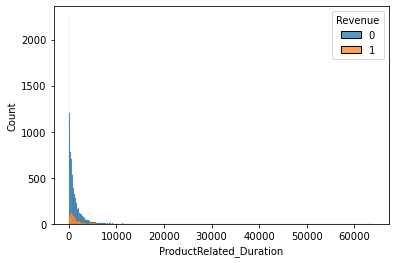

In [107]:
sns.histplot(data=df_num, x='ProductRelated_Duration', hue='Revenue', multiple='stack')

<AxesSubplot:xlabel='BounceRates', ylabel='Count'>

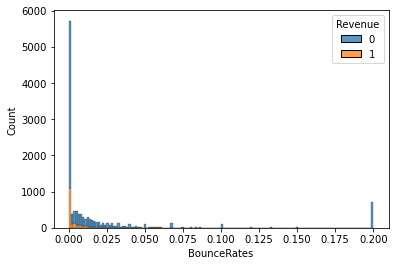

In [108]:
sns.histplot(data=df_num, x='BounceRates', hue='Revenue', multiple='stack')

(0.15, 0.22)

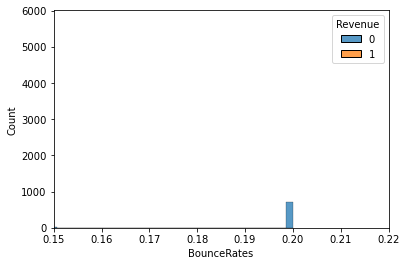

In [109]:
sns.histplot(data=df_num, x='BounceRates', hue='Revenue', multiple='stack')
plt.xlim(0.15,0.22)

<AxesSubplot:xlabel='ExitRates', ylabel='Count'>

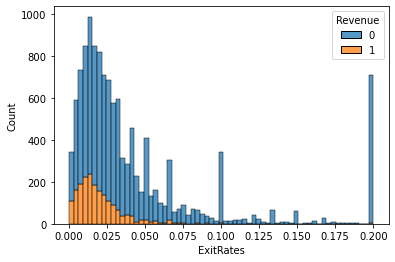

In [110]:
sns.histplot(data=df_num, x='ExitRates', hue='Revenue', multiple='stack')

<AxesSubplot:xlabel='PageValues', ylabel='Count'>

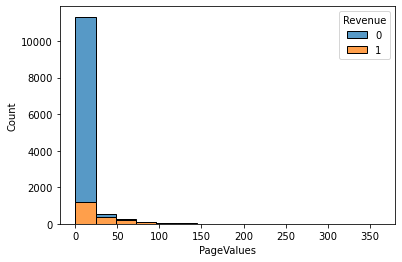

In [111]:
sns.histplot(data=df_num, x='PageValues', hue='Revenue', multiple='stack')